# Chapter 4.2 Classifying Newswires Multiclass Classification 

In this section, we’ll build a model to classify Reuters newswires into 46 mutually
exclusive topics. 

Because we have many classes, this problem is an instance of multiclass classification, and because each data point should be classified into only one category, the problem is more specifically an instance of single-label multiclass classification.

If each data point could belong to multiple categories (in this case, topics), we’d be
facing a multilabel multiclass classification problem.

### 4.2.1 The Reuters DataSet

You’ll work with the Reuters dataset, a set of short newswires and their topics, published
by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set.

Listing 4.11 Loading the Reuters Dataset

In [1]:
from tensorflow import keras
from keras.datasets import reuters 

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words= 10000)

In [2]:
print(len(train_data))
print(len(test_data))

8982
2246


In [3]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


Listing 4.12 Decoding newswires back to text

In [4]:
word_index = reuters.get_word_index()
revers_word_index = dict( (value,key) for (key,value) in word_index.items()  )

decoded_newswire = "".join( [revers_word_index.get(i-3,"?") for i in train_data[0]  ]           )
print(decoded_newswire)

???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3


In [5]:
import numpy as np
def vectorize_sequence(sequences,num_dim = 10000):
    results  = np.zeros((len(sequences),num_dim))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
    return results

List 4.13 Encoding the input data

In [6]:
x_train = vectorize_sequence(train_data).astype("float32")
x_test = vectorize_sequence(test_data).astype("float32")

List 4.14 Encoding the labels

In [7]:
def to_one_hot (labels,dimension = 46):
    results = np.zeros((len(labels),dimension))
    for i , label in enumerate(labels):
        results[i,label] = 1
    return results


y_train  = to_one_hot(train_labels).astype("float32")
y_test  = to_one_hot(test_labels).astype("float32")


There is a built-in method

In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


### 4.2.3 Builing your model

In a stack of Dense layers like those we’ve been using, each layer can only access
information present in the output of the previous layer. 

If one layer drops some information relevant to the classification problem, this information can never be
recovered by later layers: each layer can potentially become an information bottleneck.

In the previous example, we used 16-dimensional intermediate layers, but a
16-dimensional space may be too limited to learn to separate 46 different classes:
such small layers may act as information bottlenecks, permanently dropping relevant information.

Listing 4.15 Model definition

In [9]:
from tensorflow import keras
from keras import layers



model = keras.Sequential([
                        layers.Dense(units=64, activation='relu'),
                        layers.Dense(units=64, activation='relu'),
                        layers.Dense(units=46, activation='softmax'),
                        
])

+ First, we end the model with a Dense layer of size 46. This means for each input
sample, the network will output a 46-dimensional vector. Each entry in this vector
(each dimension) will encode a different output class.


+ Second, the last layer uses a softmax activation. It means the model will output a probability distribution over the 46 different output classes—for every input sample, the model will produce a 46-dimensional output vector, where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1.

The best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions.

 By minimizing the distance between these two distributions, you train the model to output something as close as possible to the true labels.

Listing 4.16 Compiling the model


When you are mentioning keras.metrics.Accuracy() you are explicitly asking the library to calculate the metric Accuracy which is simple comparison between how many target values matches the predicted values.

However, when you mention the string accuracy then depending on the type of loss you have chosen a different Metric gets selected. This is what is mentioned in the documentation of Keras,

In [54]:
model.compile(
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            loss = keras.losses.CategoricalCrossentropy(),
            metrics = ['accuracy']
                )

### 4.2.4 Validating your approach

Listing 4.17 Setting aside validation set 

In [55]:
x_val = x_train[:1000]
y_val = y_train[:1000]

pratial_x_train = x_train[1000:]
pratial_y_train = y_train[1000:]

List 4.18 Training the model 

In [56]:
history = model.fit(
        pratial_x_train,
        pratial_y_train,
        epochs = 20,
        batch_size = 512,
        validation_data = (x_val,y_val)
)

Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 0.1284 - accuracy: 0.9567 - val_loss: 0.5007 - val_accuracy: 0.9010
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 0.0977 - accuracy: 0.9597 - val_loss: 0.5538 - val_accuracy: 0.9010
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 0.0934 - accuracy: 0.9589 - val_loss: 0.5535 - val_accuracy: 0.8910
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.0921 - accuracy: 0.9592 - val_loss: 0.5698 - val_accuracy: 0.8990
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.0926 - accuracy: 0.9584 - val_loss: 0.5817 - val_accuracy: 0.8840
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.0927 - accuracy: 0.9592 - val_loss: 0.5852 - val_accuracy: 0.8830
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.0917 - accuracy: 0.9582 - val_loss: 0.5970 - val_accuracy: 0.8900
Epoch 8/20
16

In [57]:
history_dict = history.history

loss = history_dict['loss']
accuracy = history_dict['accuracy']

val_loss = history_dict['val_loss']
val_accuracy = history_dict['val_accuracy']

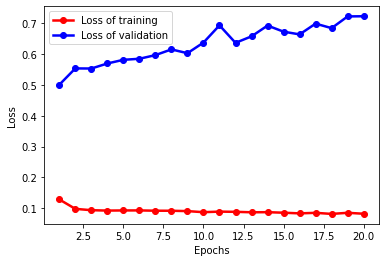

In [58]:
from matplotlib import pyplot as plt

epoch = np.arange(1,len(loss)+1)

plt.plot(epoch,loss,'o-r',lw = 2.5,label = 'Loss of training')
plt.plot(epoch,val_loss,'o-b',lw = 2.5,label = 'Loss of validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

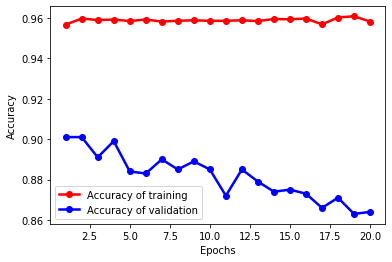

In [59]:
from matplotlib import pyplot as plt

epoch = np.arange(1,len(loss)+1)
plt.clf()
plt.plot(epoch,accuracy,'o-r',lw = 2.5,label = 'Accuracy of training')
plt.plot(epoch,val_accuracy,'o-b',lw = 2.5,label = 'Accuracy of validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Listing 4.21 Retraining a model from scratch

In [60]:
model = keras.Sequential([
                        layers.Dense(units=64,activation='relu'),
                        layers.Dense(units=64,activation='relu'),
                        layers.Dense(units=46,activation='softmax')
                        
])

In [61]:
model.compile( 
                optimizer = keras.optimizers.RMSprop(),
                loss = keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy']
            )

In [62]:
model.fit(x_train,y_train,epochs=9,batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 16ms/step - loss: 2.3946 - accuracy: 0.5377
Epoch 2/9
18/18 [==============================] - 0s 20ms/step - loss: 1.3179 - accuracy: 0.7143
Epoch 3/9
18/18 [==============================] - 0s 18ms/step - loss: 0.9830 - accuracy: 0.7828
Epoch 4/9
18/18 [==============================] - 0s 17ms/step - loss: 0.7688 - accuracy: 0.8333
Epoch 5/9
18/18 [==============================] - 0s 16ms/step - loss: 0.6049 - accuracy: 0.8725
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.4811 - accuracy: 0.8991
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.3883 - accuracy: 0.9202
Epoch 8/9
18/18 [==============================] - 0s 16ms/step - loss: 0.3176 - accuracy: 0.9330
Epoch 9/9
18/18 [==============================] - 0s 14ms/step - loss: 0.2638 - accuracy: 0.9383


In [63]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9363 - accuracy: 0.7974


[0.9362921118736267, 0.7974176406860352]

With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%. 

But in this case, we have 46 classes, and they may not be equally represented. 

What would be the accuracy of a random baseline? We could try quickly implementing one to check
this empirically

In [64]:
import copy
test_labels_copy = copy.copy(test_labels)

np.random.shuffle(test_labels_copy)

hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18699910952804988

As you can see, the random classifier would score around 19% 

### 4.2.5 Generating predictions on new data

In [65]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [66]:
predictions[0].shape

(46,)

In [67]:
np.sum(predictions[0])

1.0

In [68]:
np.argmax(predictions[0])

3

### 4.2.6 A different way to handle the labels and the loss

We mentioned earlier that another way to encode the labels would be to cast them as
an integer tensor, like this:

y_train = np.array(train_labels)


y_test = np.array(test_labels)

The only thing this approach would change is the choice of the loss function. 

The loss function used in listing 4.21, categorical_crossentropy, expects the labels to follow
a categorical encoding. With integer labels, you should use sparse_categorical_
crossentropy

model.compile(optimizer="rmsprop",
 
 loss="sparse_categorical_crossentropy",
 
 
 metrics=["accuracy"])



This new loss function is still mathematically the same as categorical_crossentropy;
it just has a different interface.

### 4.2.7 The Importance of having sufficiently Large intermediate layers

We mentioned earlier that because the final outputs are 46-dimensional, you should
avoid intermediate layers with many fewer than 46 units. 

Now let’s see what happens
when we introduce an information bottleneck by having intermediate layers that are
significantly less than 46-dimensional: for example, 4-dimensional.

Listing 4.22 A model with an information bottleneck

In [70]:
model = keras.Sequential([
        layers.Dense(64,activation='relu'),
        layers.Dense(4,activation='relu'),
        layers.Dense(46,activation='softmax')
])

model.compile(   
        optimizer = keras.optimizers.RMSprop(),
        loss = keras.losses.CategoricalCrossentropy(),
        metrics = ['accuracy']
)

model.fit(pratial_x_train,pratial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 3.5257 - accuracy: 0.2610 - val_loss: 3.1903 - val_accuracy: 0.3800
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 2.8870 - accuracy: 0.4311 - val_loss: 2.6591 - val_accuracy: 0.4300
Epoch 3/20
16/16 [==============================] - 0s 24ms/step - loss: 2.3392 - accuracy: 0.5174 - val_loss: 2.2033 - val_accuracy: 0.5710
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 1.8912 - accuracy: 0.6507 - val_loss: 1.8602 - val_accuracy: 0.6340
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 1.5667 - accuracy: 0.6840 - val_loss: 1.6420 - val_accuracy: 0.6460
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 1.3652 - accuracy: 0.6928 - val_loss: 1.5166 - val_accuracy: 0.6590
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 1.2385 - accuracy: 0.7037 - val_loss: 1.4484 - val_accuracy: 0.6610
Epoch 8/20
16

The model now peaks at ~71% validation accuracy, an 8% absolute drop. This drop is
mostly due to the fact that we’re trying to compress a lot of information into an intermediate
space that is too low-dimensional. 

The model is able to cram most of the necessary
information into these four-dimensional representations, but not all of it

### 4.2.8 Further experiments 

+ Try using larger or smaller layers: 32 units, 128 units, and so on.

+ You used two intermediate layers before the final softmax classification layer.
Now try using a single intermediate layer, or three intermediate layers.